In [2]:
import os
import pandas as pd
import glob

In [3]:
# Specify the directory for functional gene results
functional_results_directory = "../Results/Summary/"

# Specify the directory for predictable gene results
predictable_results_directory = "../Results/Predictable_res4/"

# List of dataset names
datasets = ["Skin_Melanoma", "BC_Her2ST", "Liver_visium", "Skin_cSCC", "Kidney_visium", "BC_visium"]

# Load the results of predictable genes
predictable_results_glob = os.path.join(predictable_results_directory, "predictable_*_func.csv")
df_combined_predictable = pd.concat([pd.read_csv(r, index_col=[0]) for r in glob.glob(predictable_results_glob)], ignore_index=True)
df_combined_predictable


,Unnamed: 0,index,Gene,Pearson correlation,PCC_PValue,Spearmanr correlation,SPC_PValue,SSIM_Score,Cosine_Score,Moran'I_Score,Slides,Dataset,Method
0,1,1,CD14,0.052389,0.105855,0.038065,0.182173,0.019641,0.869125,0.000367,E2,BC_Her2ST,histogene
1,2,2,NOTCH1,0.026907,0.260726,0.015441,0.356486,0.007120,0.407320,-0.000910,E2,BC_Her2ST,histogene
2,8,8,ERRFI1,-0.010376,0.597614,0.003268,0.468971,0.001319,0.359955,0.024121,E2,BC_Her2ST,histogene
3,10,10,STAT2,0.017581,0.337662,0.030029,0.237143,0.010954,0.826604,0.019334,E2,BC_Her2ST,histogene
4,11,11,NASP,0.012331,0.384469,0.007353,0.430473,0.005341,0.508852,0.000090,E2,BC_Her2ST,histogene
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187231,71540,1676,DPP4,-0.004302,0.578375,0.000223,0.495918,0.003278,0.397973,0.014745,C,Kidney_visium,histogene
187232,71542,1678,SYPL1,-0.035360,0.947997,-0.024532,0.870278,-0.003183,0.620242,-0.052073,C,Kidney_visium,histogene
187233,71547,1683,PPP2CB,-0.089437,0.999981,-0.074644,0.999704,-0.014372,0.649790,-0.071583,C,Kidney_visium,histogene
187234,71548,1684,TNFRSF1B,0.024884,0.126333,0.034481,0.056448,0.004856,0.241384,0.005331,C,Kidney_visium,histogene


In [4]:
df_combined_predictable['Dataset'].unique()

array(['BC_Her2ST', 'BC_visium', 'Skin_cSCC', 'Liver_visium',
       'Skin_Melanoma', 'Kidney_visium'], dtype=object)

In [5]:
g_BC_Her2ST = set(df_combined_predictable[df_combined_predictable['Dataset']=='BC_Her2ST']['Gene'])
g_BC_visium = set(df_combined_predictable[df_combined_predictable['Dataset']=='BC_visium']['Gene'])
g_Skin_cSCC = set(df_combined_predictable[df_combined_predictable['Dataset']=='Skin_cSCC']['Gene'])
g_Liver_visium = set(df_combined_predictable[df_combined_predictable['Dataset']=='Liver_visium']['Gene'])
g_Skin_Melanoma = set(df_combined_predictable[df_combined_predictable['Dataset']=='Skin_Melanoma']['Gene'])
g_Kidney_visium = set(df_combined_predictable[df_combined_predictable['Dataset']=='Kidney_visium']['Gene'])


In [10]:
len(g_Skin_cSCC &  g_Skin_Melanoma)

248

In [8]:
len(g_BC_Her2ST & g_BC_visium & g_Skin_cSCC & g_Liver_visium & g_Skin_Melanoma & g_Kidney_visium)


66

In [6]:
for e in g_BC_Her2ST:
    print(e)
# print(len(g_BC_Her2ST))

E2F1
FUBP1
RRM2
COL3A1
USP9X
HDAC2
CTSD
C1S
ARID1A
EZH2
E2F5
KMT2A
BRD7
DHX9
HSPA1A
PRKCD
IDH1
PYCR1
TK1
CXCL9
CD14
EIF4E
SMARCB1
BST2
TCF3
PDIA6
POLR2H
C3
PIK3R3
CD68
HLA-DRA
CTSS
ELF3
PARP1
THBS1
SYPL1
MACF1
RBX1
CD276
HMGB1
HLA-DQB1
PPP2CB
TCF12
A2M
CEBPB
MED12
CREBBP
CD63
JUNB
SF3B1
TRAF7
SETD2
CD74
FH
SDHAF2
ACTN1
APP
CD55
ACTN4
HMGA1
MCL1
COL1A2
GNA11
PIN1
AR
PFN1
SOX9
MARCKSL1
CTNNA1
MDM2
VPS28
PTEN
C1QBP
NFKBIA
DHX15
TIMP1
PIK3R1
IGF2R
YAP1
UBE2T
RHOA
AKT1
LTBR
IER3
RAC1
EIF4EBP1
MCM6
RELA
PBRM1
CCL5
LGALS3
CD44
RBM47
CD24
CLU
HLA-DPB1
SMARCD1
C1QA
EFNA3
ATG16L1
ANP32B
IGHA1
TNFRSF12A
IQGAP1
TPX2
RAD21
CD164
MFGE8
TGFB1
MAPK14
SMC4
MUC1
VEGFA
CXCL13
ERAP1
TNFRSF1A
NUSAP1
CKLF
NUPR1
MAP3K12
SRC
PLAU
FN1
ANXA2
ST6GAL1
ELK1
PKMYT1
ISG20
GATA3
ITGAX
CCND1
CD81
GADD45G
LRP1
STK11
CD37
RANGAP1
NF1
INPPL1
ERBB3
CDC73
CD53
TYK2
TBL1XR1
CEBPA
LAMP2
RUNX1
PSMD2
TOP2A
XBP1
CD47
DUSP1
AKT2
ASXL1
DDIT4
WEE1
ZFP36L2
BCL2L1
CCNE2
CUL3
CDC20
POLE
NOTCH3
COL5A1
MAPK1
HLA-DQA1
ANXA4
LRBA
DDX3X
D

In [139]:
for e in g_BC_visium:
    print(e)
# print(len(g_BC_visium))

IFNAR1
HSPB1
USP9X
HMGB1
MAPKAPK2
TNFRSF14
RHOB
DNMT1
MAP3K1
MGMT
ITGB4
JAK1
FOXO3
DOCK9
HSPA1A
ATG12
PIK3R3
MYH9
AFDN
HDAC5
IL13RA1
PMS2
NFKB2
YES1
UBE3A
CCNB1
SMC1A
CTNNB1
USP1
APP
ANXA2
EIF4A2
SRC
GRB2
TCF12
LTBR
EIF4E
PRKAR2A
RAD51C
PFN1
BRD8
LAMP1
RGS1
FH
SMARCA4
EP300
SPTAN1
UBE2C
HLA-F
NF1
POLR2H
ELF3
PIK3R2
CLU
TP53
PSMB7
RBX1
CDH1
TNFSF10
CUL3
SIGIRR
PDIA4
NBN
MAPK8
BAD
MCM2
MARCKSL1
PPP6C
XPO1
MAPK14
HSP90B1
EFNA1
ALCAM
NASP
ASXL1
S100A10
INSR
PSMB8
CD99
NCOR1
IFNGR1
TFE3
MAP2K2
BAX
IDH2
CD9
JUNB
COMMD3
KANSL1
C1QB
SP100
PDPK1
THRAP3
ZFP36L2
EIF4EBP1
BMPR1A
ILF3
NCK1
MCM7
ERCC1
TFDP1
KMT2C
CACNB3
POLE
EPCAM
BID
PPP2CB
NUP93
CTSB
MEN1
PRKACA
TXNIP
TYMS
SMAD4
DHX9
STAT5A
ITGA3
CTNNA1
RAC1
MTOR
CD63
SUZ12
DAXX
BRD4
STAT1
MAP2K1
CD68
BCL7A
SMARCB1
HDAC1
GNA13
ARID1A
MYB
LGALS3
SBNO2
PSEN1
MYC
VEGFA
ERBB2
ARHGEF7
PRKDC
NFKBIA
RXRA
HLA-DMA
NUP133
STK11
CCND1
STOM
ARID2
CNOT2
CD44
ATF2
LCP1
MSH6
TGIF1
JUN
ARID1B
NFKB1
MAX
SDC1
NOTCH3
MAP3K7
ABL1
RAF1
GTF2I
KIF5B
ID2
LAMA5
IRF1
MGST1

In [140]:
for e in g_Skin_cSCC:
    print(e)
# print(len(g_Skin_cSCC))

IFNAR1
HSPB1
TNFRSF12A
FGFR3
RAD50
USP9X
HMGB1
GNAQ
MAPKAPK2
RHOB
DNMT1
PDGFRB
RUNX1
ITGB4
THBD
FEN1
JAK1
HLA-E
TNFRSF25
DOCK9
HSPA1A
MYH9
RRAS2
KLF5
F2RL1
IL13RA1
PLD1
YES1
PML
CCNB1
SMC1A
CTNNB1
APP
ANXA2
POLR2J
CLIP1
SERPINB2
EIF4A2
SRC
NFKBIZ
GRB2
BTG2
LTBR
EIF4E
PRKAR2A
BCL2L2
TGFBR1
PFN1
LAMP1
IDH1
MAFB
TNC
IFI16
RIN1
MALT1
FH
SMARCA4
CTCF
IL4R
TRIM56
TUBB4B
SPTAN1
ID1
HLA-F
APOE
NUPR1
POLR2H
PIK3R2
MDM4
CHD3
PSMB7
RBX1
PARP1
CDH1
IFI27
CCND2
TAP2
PDIA4
HDAC4
C1S
TPX2
BAD
IL20RB
PPP6C
XPO1
MAPK14
HSP90B1
EFNA1
S100A9
NASP
ASXL1
S100A10
COL4A5
PPP2R2C
ITGA6
LAMB3
PSMB8
CD99
CTSL
NCOR1
CIC
IFNGR1
WNT7B
TFE3
MAP2K2
IGFBP3
SKP1
IDH2
CD9
C1QA
YBX3
JUNB
COMMD3
U2AF1
C1QB
ZC3H12A
PLA2G4F
SP100
CTSD
THRAP3
ZFP36L2
EIF4EBP1
ILF3
STAT6
BTG1
MCM7
ERCC1
TFDP1
CXCL14
CALML5
PPP3CA
FLNA
SFN
MCAM
S100A8
PPP2CB
NUP93
CTSB
EMP3
PRKACA
BCL11B
TXNIP
TYMS
SMAD4
SDHAF2
DHX9
ITGA3
IFITM2
FOS
CTNNA1
RAC1
CD63
CRKL
BAP1
POLR2D
PYGL
PRKAR1A
SOCS3
BRD4
GNA15
STAT1
MAP2K1
CBLC
PTPN11
SMARCB1
HSPA2
CASP1
HD

In [141]:
for e in g_Liver_visium:
    print(e)
# print(len((g_Liver_visium)))

IFNAR1
HSPB1
FGFR3
RAD50
USP9X
HMGB1
CXCL12
IGF1
MAPKAPK2
AR
RHOB
TNFRSF14
NTHL1
MGMT
IL33
THBD
GADD45A
FGFR4
JAK1
PCK1
IKBKG
FOXO3
HLA-E
CEACAM1
LAMC3
IRF2
HSPA1A
ATG12
MYH9
AFDN
RRAS2
HDAC5
IL13RA1
PLD1
YES1
UBE3A
PDGFRA
BNIP3
HSD3B7
SMC1A
DTX4
PRG2
CTNNB1
APP
ANXA2
POLR2J
EIF4A2
NGFR
PRKCA
CFB
RFC1
HNF1A
NFKBIZ
GRB2
TBX3
FGFR2
KAT2B
LTBR
EIF4E
PRKAR2A
PFN1
LAMP1
IDH1
RAB27A
MAFB
NEU4
FH
ICAM3
CCL15
C8G
EP300
IL4R
TUBB4B
SMO
SPTAN1
ID1
APOE
NUPR1
HSD11B1
POLR2H
CLU
TP53
BST2
GHR
PIK3R2
PSMB7
RBX1
PARP1
CDH1
IFI27
TNFSF10
CUL3
SIGIRR
PDIA4
DUSP6
C1S
BAD
MARCKSL1
APOB
PPP6C
XPO1
MAPK14
HSP90B1
S100A9
EFNA1
ALCAM
NASP
ASXL1
S100A10
INSR
SAA1
PSMB8
CD99
NCOR1
CTSL
ST6GAL1
CCL21
CIC
IRS2
IFNGR1
TFE3
HDAC6
MAP2K2
IGFBP3
ITCH
HHEX
SKP1
IDH2
CD9
C1QA
JUNB
C9
COMMD3
GADD45G
C1QB
SP100
PDPK1
CTSD
THRAP3
ZFP36L2
EIF4EBP1
ILF3
CD36
STAT6
NCK1
BTG1
MCM7
ITGA5
ERCC1
CXCL14
TFDP1
SDC2
FLNA
BID
S100A8
PPP2CB
DPP4
CTSB
SKP2
MEN1
PRKACA
CYFIP2
CD4
TXNIP
SMAD4
COP1
DHX9
SDHAF2
IFITM2
CTNNA1
RAC1
MTOR
C

In [142]:
for e in g_Skin_Melanoma:
    print(e)
# print(len(g_Skin_Melanoma))

SMPD3
IFNAR1
FOXP1
HSPB1
WIPI1
FGFR3
HMGB1
CXCL12
GNAQ
MAPKAPK2
RHOB
TNFRSF14
DNMT1
PDGFRB
RUNX1
MAP3K1
AXIN2
ITGB4
THBD
ID4
IKBKG
CDK12
FOXO3
HLA-E
TNFRSF25
LAMB4
HSPA1A
ATG12
MYH9
AFDN
HDAC5
KLF5
NFKB2
PML
UBE3A
CTNNB1
APP
ANXA2
CLIP1
SERPINB2
EIF4A2
NFKBIZ
KAT2B
FGFR2
BTG2
LTBR
BCL2L2
PFN1
CCL27
LAMP1
ARID5B
MAFB
TNC
TET2
IFI16
MALT1
SMARCA4
EP300
IL4R
TRIM56
SPTAN1
ID1
APOE
HLA-F
NUPR1
POLR2H
IRF8
PIK3R2
TP53
MDM4
BST2
PSMB7
RBX1
ITGB2
CDH1
IFI27
TNFSF10
CUL3
TAP2
SIGIRR
PDIA4
DUSP6
MARCKSL1
IL20RB
PTPRC
XPO1
MAPK14
S100A9
ASXL1
S100A10
PPP2R2C
ITGA6
PSMB8
CD99
NCOR1
TRAC
MAP2K2
IDH2
CD9
JUNB
C1QB
ZC3H12A
TRBC2
PLA2G4F
CTSD
THRAP3
ZFP36L2
EIF4EBP1
CSF1R
ILF3
STAT6
MCM7
ERCC1
CXCL14
TFDP1
KMT2C
CALML5
RASGRP1
FLNA
PRDM1
MCAM
S100A8
PPP2CB
NUP93
CTSB
EMP3
PRKACA
TXNIP
DHX9
STAT5A
IFITM2
ITGA3
FOS
CTNNA1
RAC1
CD63
SUZ12
IKZF1
TGFBR2
IL32
DNMT3A
DAXX
BRD4
STAT1
MAP2K1
CBLC
DUSP1
CD3E
HSPA2
HDAC1
CD74
ARID1A
LGALS3
BCL2
MSN
SBNO2
LTB
MYC
PLCG1
ERBB2
OAS3
NSD3
NFKBIA
RXRA
ANXA1
IGF1R
HLA

In [143]:
for e in g_Kidney_visium:
    print(e)
# print(len(g_Kidney_visium))

HSPB1
HAVCR2
IFNGR1
SPP1
IL6R
USP9X
NR4A1
HMGB1
GTF2I
GNAQ
MAPKAPK2
NLRC5
KIF5B
MAP2K2
IGFBP3
LAMA5
ID2
RHOB
TNFRSF14
TBL1XR1
IRF1
SKP1
JAG1
MGST1
B2M
ACVR1B
IDH2
CEBPD
ERBB3
CD9
DOCK8
TNFRSF1B
DHX15
CXCL16
SERPINA1
JAK1
EWSR1
MAPK1
FOXO3
SP100
PDPK1
CTSD
HLA-E
OSMR
ELOC
TOLLIP
ZFP36L2
MGAT1
EIF4EBP1
MICA
ILF3
HSPA1A
STAT6
BTG1
STAT5B
NOTCH2
MCM7
MYH9
AFDN
VEGFB
HDAC5
ERCC1
EGFR
ENG
CXCL14
ATM
F2RL1
IL13RA1
NFKB2
STMN1
ITGA1
SP1
SERPING1
RHOA
ANXA4
IFI35
CTNND1
BNIP3
HSD3B7
RPA3
MET
TAP1
PPP2CB
PTEN
DPP4
PLK2
CTSB
HLA-DPA1
APP
CD34
ANXA2
BTN3A1
POLR2J
EDNRB
PRKACA
GNG12
CD59
TXNIP
TYMS
IL6ST
EIF4A2
SMAD4
LAMP2
DHX9
SRSF2
IFITM2
PSMB9
CTNNA1
KEAP1
HLA-DQA1
GRB2
RAC1
CD63
MACF1
TGFBR2
IL32
RHEB
PFN1
LRP2
SMAD2
CXCR4
LAMP1
FYN
PYGL
PRKAR1A
BRD4
PAX8
SHC1
RGS1
IFI16
PDIA6
ZFP36L1
MAF
IFNAR2
DUSP1
PSMB10
CD74
ACTN4
TUBB4B
SDHA
CDH5
IGBP1
LGALS3
GPI
MAPT
ITGB1
MSN
NRP1
SBNO2
RAD21
HLA-F
ERRFI1
VPS28
BCL2
RBM47
NUPR1
IFIT1
LDHA
POLR2H
VEGFA
MME
CLU
BST2
PSMB7
RBX1
WEE1
DDIT4
ITGB2
HLA-DPB1
AR

In [16]:
%cd /scratch/smp/uqjxie6/DeepHis2Exp/Figures

/scratch/smp/uqjxie6/DeepHis2Exp/Figures


In [23]:
df = pd.read_csv('g_Kidney_visium.txt', sep='\t')

In [75]:
df['Term2'] = df['Term'].replace(r' R-HSA-\d+', '', regex=True)


0                              Immune System R-HSA-168256
1       Cytokine Signaling In Immune System R-HSA-1280215
2                  Signaling By Interleukins R-HSA-449147
3                                   Disease R-HSA-1643685
4                       Innate Immune System R-HSA-168249
                              ...                        
1115        Cellular Response To Starvation R-HSA-9711097
1116                   Ion Channel Transport R-HSA-983712
1117                Phospholipid Metabolism R-HSA-1483257
1118                   Biological Oxidations R-HSA-211859
1119                     Sensory Perception R-HSA-9709957
Name: Term, Length: 1120, dtype: object

In [79]:
df['Term3'] = df['Term2'].map(lambda x: f"{' '.join(x.split(' ')[:6])}\n{' '.join(x.split(' ')[6:])}")

In [29]:
import numpy as np
import matplotlib.pyplot as plt
df['-logp']=-np.log(df['Adjusted P-value'])

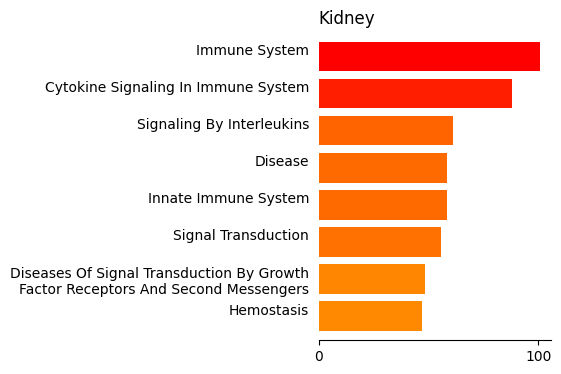

In [93]:
# fig = plt.figure(figsize=(1,6))
colors = [(1, 1, 0), (1, 0, 0)]
from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list(
    'color_map', colors, N=100)

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))    
# plt.barh(x,y,color=my_cmap(rescale(y)))
# plt.show()


df.head(8).plot.barh(x='Term3', y='-logp',width=0.8,color=my_cmap(rescale(df['-logp'])))
# plt.xticks([], [])
plt.xticks([0,100])
plt.ylabel('')
# plt.xlabel('-log(p)')
plt.yticks(fontsize=10)
plt.tick_params(left = False) 
plt.legend('',frameon=False)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().invert_yaxis()
# plt.suptitle('Kidney_visium', loc='left')
plt.title('Kidney', loc='left')

fig = plt.gcf()
fig.set_size_inches(3,4)

In [146]:
def plott(df, ax, title, lim=100):
    # fig = plt.figure(figsize=(1,6))
    colors = [(1, 1, 0), (1, 0, 0)]
    from matplotlib.colors import LinearSegmentedColormap
    my_cmap = LinearSegmentedColormap.from_list(
        'color_map', colors, N=100)
    
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))    
    # plt.barh(x,y,color=my_cmap(rescale(y)))
    # plt.show()
    df['Term2'] = df['Term'].replace(r' R-HSA-\d+', '', regex=True)
    df['Term3'] = df['Term2'].map(lambda x: f"{' '.join(x.split(' ')[:6])}\n{' '.join(x.split(' ')[6:])}")
    df['-logp']=-np.log(df['Adjusted P-value'])
    df.head(8).plot.barh(x='Term3', y='-logp',width=0.8,color=my_cmap(rescale(df['-logp'])),ax=ax)
    # plt.xticks([], [])
    ax.set_xticks([0,lim])
    ax.set_ylabel('')
    # plt.xlabel('-log(p)')
    # ax.set_yticks(fontsize=10)
    ax.tick_params(left = False) 
    ax.legend('',frameon=False)
    # ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.invert_yaxis()
    # plt.suptitle('Kidney_visium', loc='left')
    ax.set_title(title, loc='left', fontweight='semibold')
    
    # fig = plt.gcf()
    # fig.set_size_inches(3,4)

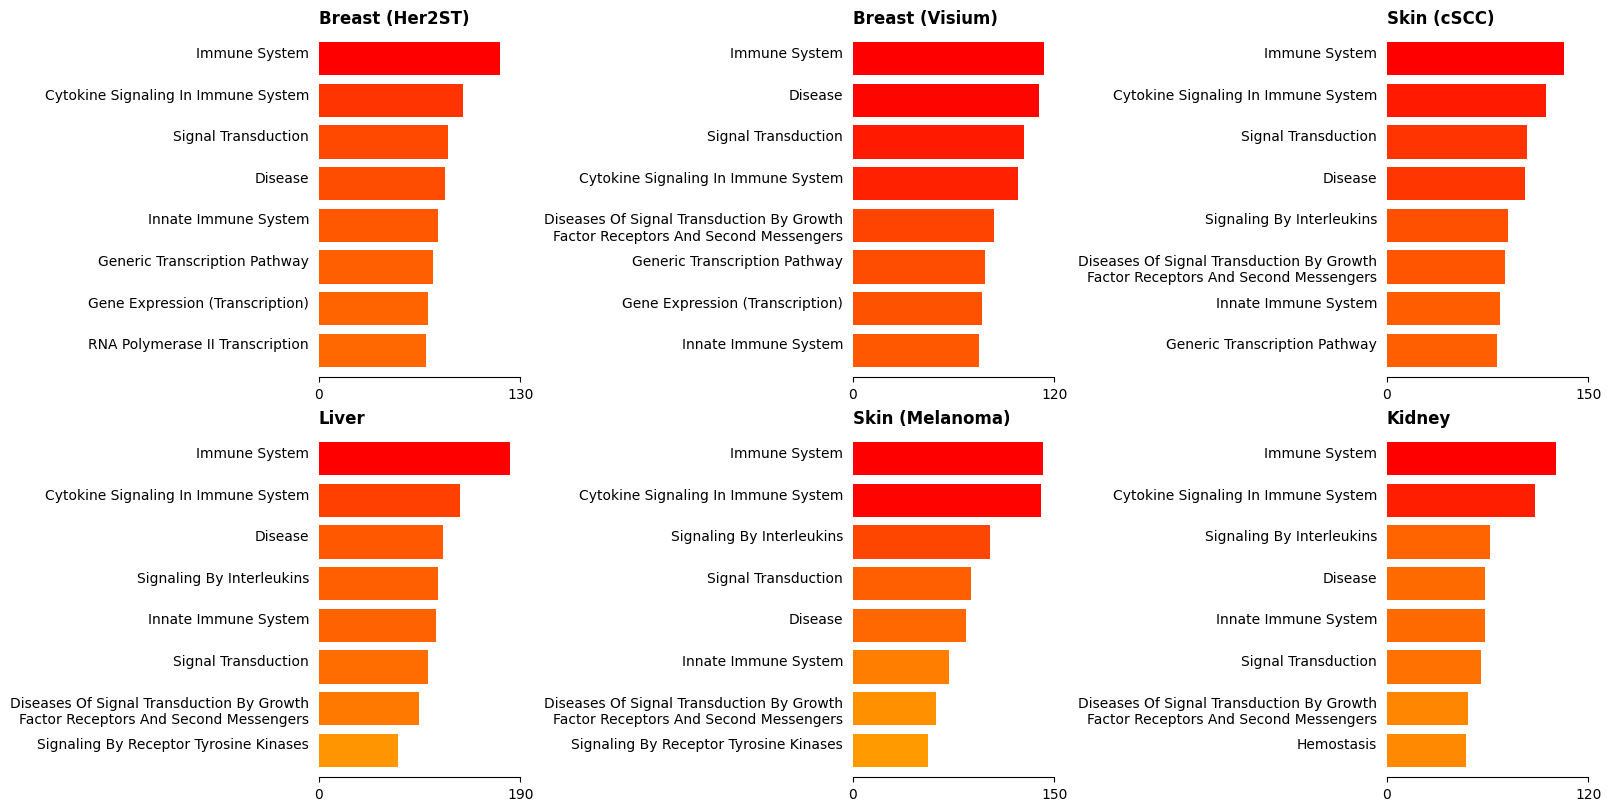

In [155]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8), layout='constrained')

# ["g_BC_Her2ST", "g_BC_visium", "g_Skin_cSCC", "g_Liver_visium", "g_Skin_Melanoma", "g_Kidney_visium"]

df = pd.read_csv('g_BC_Her2ST.txt', sep='\t')
plott(df, ax[0][0], 'Breast (Her2ST)', 130)

df = pd.read_csv('g_BC_visium.txt', sep='\t')
plott(df, ax[0][1], 'Breast (Visium)',120)

df = pd.read_csv('g_Skin_cSCC.txt', sep='\t')
plott(df, ax[0][2], 'Skin (cSCC)',150)

df = pd.read_csv('g_Liver_visium.txt', sep='\t')
plott(df, ax[1][0], 'Liver',190)

df = pd.read_csv('g_Skin_Melanoma.txt', sep='\t')
plott(df, ax[1][1], 'Skin (Melanoma)', 150)

df = pd.read_csv('g_Kidney_visium.txt', sep='\t')
plott(df, ax[1][2], 'Kidney',120)

fig.savefig('enrich.pdf',bbox_inches='tight')